# Klasifikace

## Dataset pro tuto metodu dolování dat
Pro dva druhy (Cammeo a Osmancik) bylo pořízeno celkem 3810 snímků rýžových zrn, které byly zpracovány a byly provedeny závěry o vlastnostech. Pro každé zrnko rýže bylo získáno 7 morfologických znaků.

https://www.kaggle.com/datasets/muratkokludataset/rice-dataset-commeo-and-osmancik?resource=download


## Nejdřív se načte dataset a prozkoumá se

In [1]:
import pandas as pd

#nacteni dat z xlsx souboru
df = pd.read_excel("datasets/Rice_Cammeo_Osmancik.xlsx")
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.2+ KB


In [3]:
df.nunique().sort_values()

Class                   2
Area                 2828
Convex_Area          2857
Perimeter            3738
Eccentricity         3803
Minor_Axis_Length    3804
Extent               3804
Major_Axis_Length    3808
dtype: int64

In [4]:
df.isna().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

In [5]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144753,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


array([[<AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Perimeter'}>,
        <AxesSubplot:title={'center':'Major_Axis_Length'}>],
       [<AxesSubplot:title={'center':'Minor_Axis_Length'}>,
        <AxesSubplot:title={'center':'Eccentricity'}>,
        <AxesSubplot:title={'center':'Convex_Area'}>],
       [<AxesSubplot:title={'center':'Extent'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

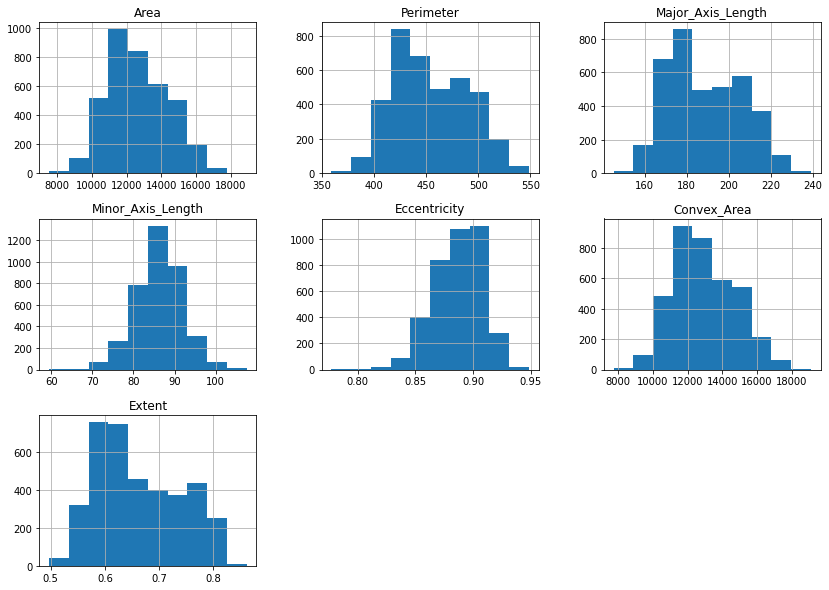

In [6]:
df[df.columns[:-1]].hist(figsize=(14,10))

## Použití knihovny scikit-learn

In [7]:
X = df[df.columns[:-1]]
y = df['Class']

Data rozdelime na trenovaci a testovaci mnozinu


In [8]:
from sklearn.model_selection import train_test_split

#rozdeleni datove sady na trenovaci a testovaci mnozinu
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=14)

## Rozhodovací stromy

In [9]:
#nacteni funkce z knihovny
from sklearn.tree import DecisionTreeClassifier

#tvorba rozhodovaciho stromu
dt_clf = DecisionTreeClassifier()
#trenovani
dt_clf = dt_clf.fit(X_train,y_train)

In [10]:
#testovani
y_predicted_dt = dt_clf.predict(X_test)

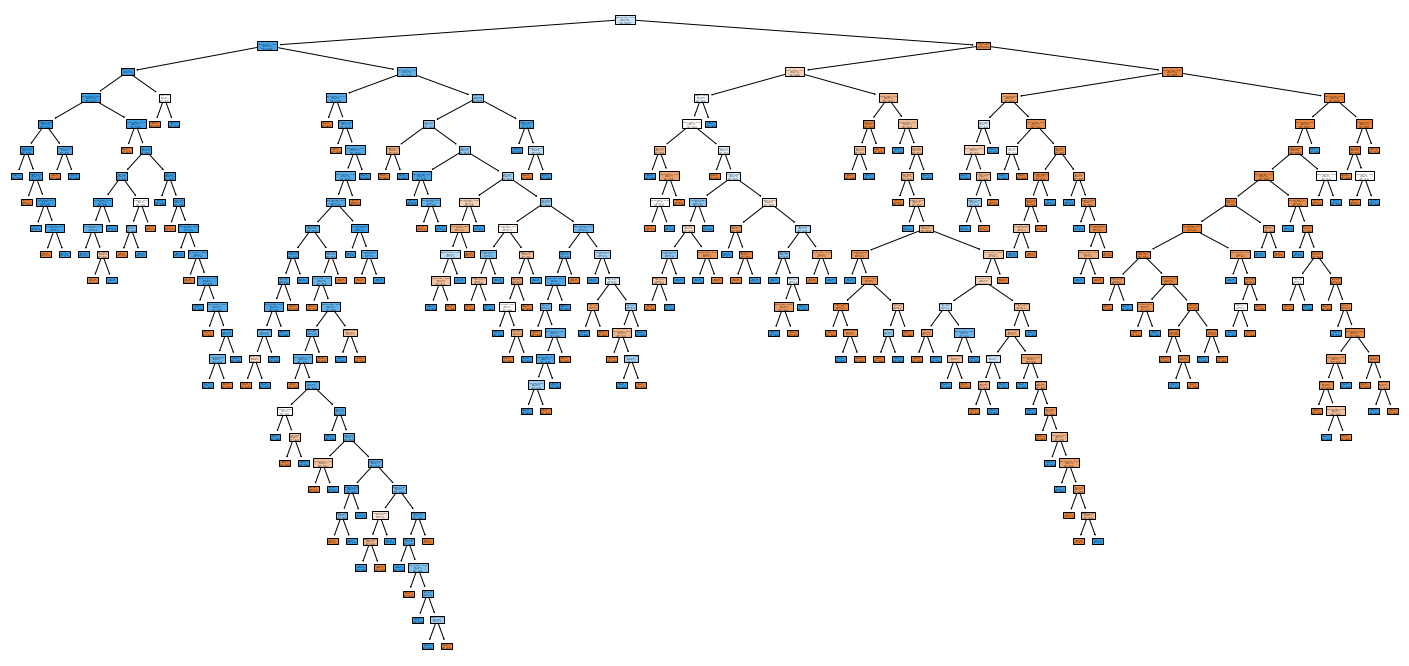

In [11]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,12))
_=tree.plot_tree(dt_clf, feature_names=df[df.columns[:-1]].columns, class_names=df['Class'].values, filled=True)
fig.show()

In [12]:
from sklearn import metrics

dt_accuracy = metrics.accuracy_score(y_test,y_predicted_dt)
dt_matrix = metrics.confusion_matrix(y_test, y_predicted_dt)

## Náhodné lesy

In [13]:
from sklearn.ensemble import RandomForestClassifier

#tvorba nahodneho lesa
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [14]:
#testovani
y_predicted_rf = rf_clf.predict(X_test)

rf_accuracy = metrics.accuracy_score(y_test, y_predicted_rf)
rf_matrix = metrics.confusion_matrix(y_test, y_predicted_rf)

## Bayesovská klasifikace

In [15]:
from sklearn.naive_bayes import GaussianNB

#tvorba bayesovské klasifikace
nb_clf = GaussianNB()
nb_clf.fit(X_train,y_train)

GaussianNB()

In [16]:
y_predicted_nb = nb_clf.predict(X_test)

nb_accuracy = metrics.accuracy_score(y_test, y_predicted_nb)
nb_matrix = metrics.confusion_matrix(y_test, y_predicted_nb)

## Neuronové sítě

Data pro neuronovou síť je třeba normalizovat

In [17]:
from sklearn.preprocessing import normalize

X_normalized = normalize(X, norm='max')

X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_normalized,y, random_state=14)

In [18]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes=(4,), random_state=14)
mlp_clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(4,), random_state=14)

In [19]:
y_predicted_mlp = mlp_clf.predict(X_test)

mlp_accuracy = metrics.accuracy_score(y_test, y_predicted_mlp)
mlp_matrix = metrics.confusion_matrix(y_test, y_predicted_mlp)

## K – nejbližších sousedů

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [21]:
y_predicted_knn = knn_clf.predict(X_test)
knn_accuracy = metrics.accuracy_score(y_test, y_predicted_knn)
knn_matrix = metrics.confusion_matrix(y_test, y_predicted_knn)

## Porovnání modelu

In [22]:
models = pd.DataFrame({
    'Model' : ['Rozhodovací stromy', 'Náhodné lesy', 'Bayesovská klasifikace', 'Neuronové sítě', 'K–nejbližších sousedů'],
    'Skore' : [dt_accuracy*100,rf_accuracy*100,nb_accuracy*100,mlp_accuracy*100,knn_accuracy*100]
})


models.sort_values(by = 'Skore', ascending = False)

,Model,Skore
1,Náhodné lesy,91.920252
2,Bayesovská klasifikace,91.605456
0,Rozhodovací stromy,88.457503
4,K–nejbližších sousedů,88.457503
3,Neuronové sítě,56.663169


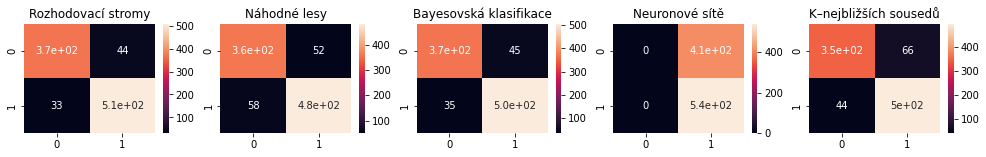

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(17,2))
plt.subplot(1,5,1).set_title('Rozhodovací stromy')
sns.heatmap(pd.DataFrame(rf_matrix), annot=True)
plt.subplot(1,5,2).set_title('Náhodné lesy')
sns.heatmap(pd.DataFrame(dt_matrix), annot=True)
plt.subplot(1,5,3).set_title('Bayesovská klasifikace')
sns.heatmap(pd.DataFrame(nb_matrix), annot=True)
plt.subplot(1,5,4).set_title('Neuronové sítě')
sns.heatmap(pd.DataFrame(mlp_matrix), annot=True)
plt.subplot(1,5,5).set_title('K–nejbližších sousedů')
sns.heatmap(pd.DataFrame(knn_matrix), annot=True)

plt.savefig("modely.svg", format="svg")

## Použití knihovny mlxtend

In [24]:
from mlxtend.preprocessing import minmax_scaling

In [25]:

#predzpracovani dat pro mlxtend a rozdeleni do trenovaci a testovaci mnoziny
df_mlxtend = df.copy()
class_map = {"Cammeo": 0, "Osmancik": 1}

df_mlxtend = df_mlxtend.applymap(lambda s: class_map.get(s) if s in class_map else s)

X_m = df_mlxtend[df_mlxtend.columns[:-1]]
y_m = df_mlxtend['Class']

X_mlxtend=minmax_scaling(X_m, columns=['Area',	'Perimeter',	'Major_Axis_Length',	'Minor_Axis_Length',	'Eccentricity',	'Convex_Area',	'Extent'])

X_trainM, X_testM, y_trainM, y_testM = train_test_split(X_mlxtend,y_m, random_state=14)
#tridy mlxtendu neprijmaji pd.Dataframe, ale np.array
X_trainM = X_trainM.values
X_testM = X_testM.values

y_trainM = y_trainM.values
y_testM = y_testM.values

## Neuronové sítě

In [26]:
from mlxtend.classifier import Perceptron
#vytvoreni modelu a trenovani
ppn = Perceptron()
ppn.fit(X_trainM, y_trainM)

In [27]:
#testovani
y_predicted_ppn = ppn.predict(X_testM)

In [28]:
from mlxtend.evaluate import accuracy_score

accuracy_score(y_testM, y_predicted_ppn)*100

85.7292759706191

In [29]:
from mlxtend.evaluate import confusion_matrix

cm = confusion_matrix(y_testM, y_predicted_ppn)

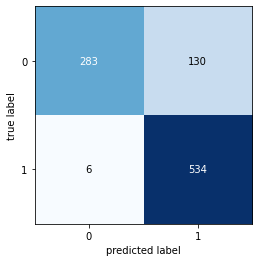

In [30]:
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [31]:
from mlxtend.classifier import MultiLayerPerceptron as MLP

nn1 = MLP(hidden_layers=[4])

nn1 = nn1.fit(X_trainM, y_trainM)

/workspaces/BP/.python38/lib/python3.8/site-packages/mlxtend/classifier/multilayerperceptron.py:258: RuntimeWarning: divide by zero encountered in log
  return - np.sum(np.log(output) * (y_target), axis=1)
/workspaces/BP/.python38/lib/python3.8/site-packages/mlxtend/classifier/multilayerperceptron.py:258: RuntimeWarning: invalid value encountered in multiply
  return - np.sum(np.log(output) * (y_target), axis=1)


In [32]:
y_predicted_nn1 = nn1.predict(X_testM)

In [33]:
accuracy_score(y_testM, y_predicted_nn1)*100

56.66316894018888

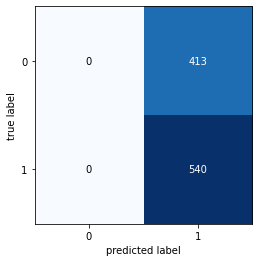

In [34]:
cm2 = confusion_matrix(y_testM, y_predicted_nn1)
fig, ax = plot_confusion_matrix(conf_mat=cm2)
plt.show()

In [35]:
from mlxtend.classifier import Adaline

ada = Adaline()
ada.fit(X_trainM, y_trainM)

In [36]:
y_predicted_ada=ada.predict(X_testM)

In [37]:
accuracy_score(y_testM, y_predicted_ada)*100

92.86463798530956

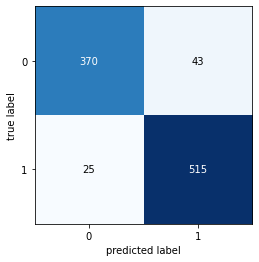

In [38]:
cm3 = confusion_matrix(y_testM, y_predicted_ada)
fig, ax = plot_confusion_matrix(conf_mat=cm3)
plt.show()

## Použití knihovny PyCaret

In [39]:
from pycaret.classification import *

In [40]:
#predzpracovani dat, rozdeleni na testovaci a trenovaci mnozinu, nastaveni atributu podle, ktereho se bude klasifikova a interaktivni mod vypnuty
exp = setup(data=df, target='Class', silent=True)

,Description,Value
0,session_id,2103
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"Cammeo: 0, Osmancik: 1"
4,Original Data,"(3810, 8)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


## Rozhodovací stromy

In [41]:
#vytvoreni, trenovani a testovani modelu
dt = create_model('dt', cross_validation=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8916,0.8892,0.9128,0.893,0.9028,0.7803,0.7806


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


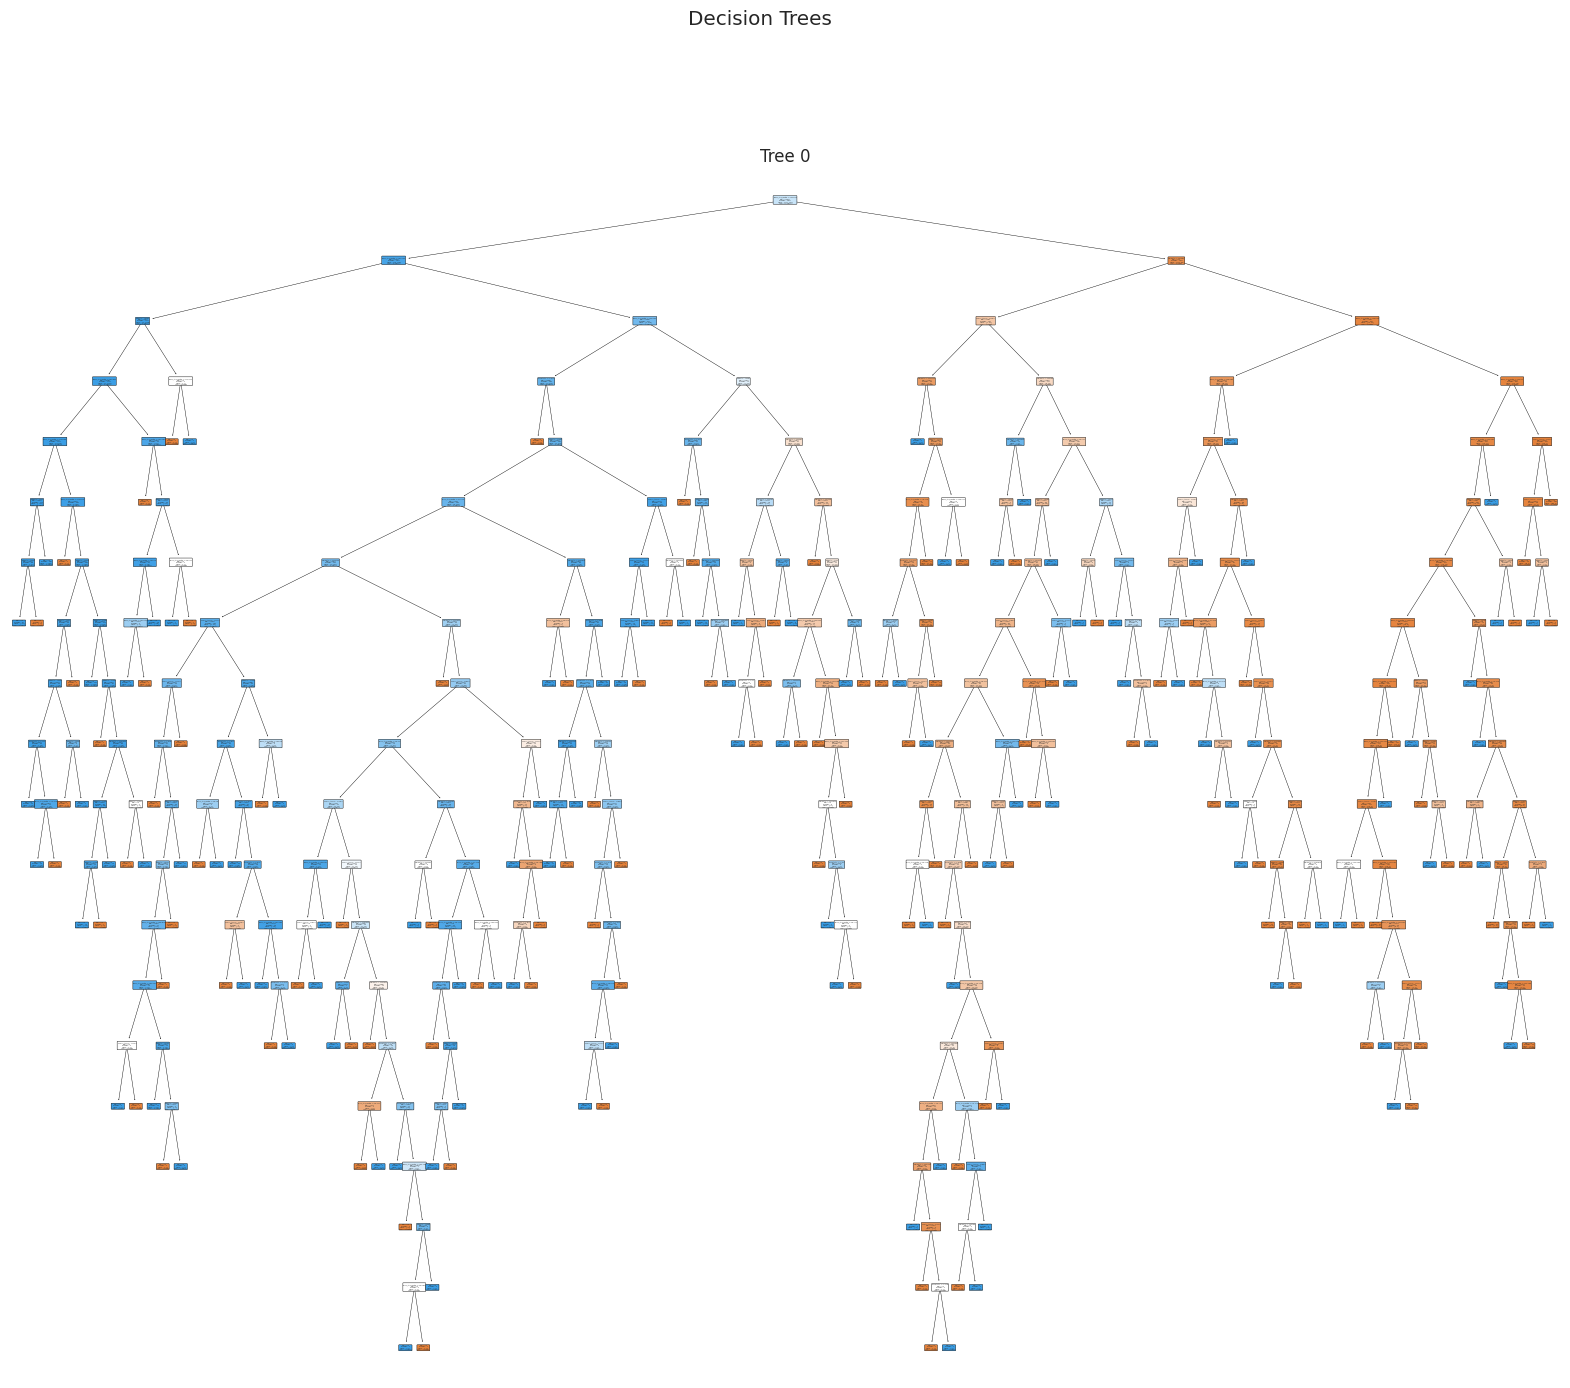

In [42]:
#vykresleni rozhodovaciho stromu
plot_model(dt, plot = 'tree')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


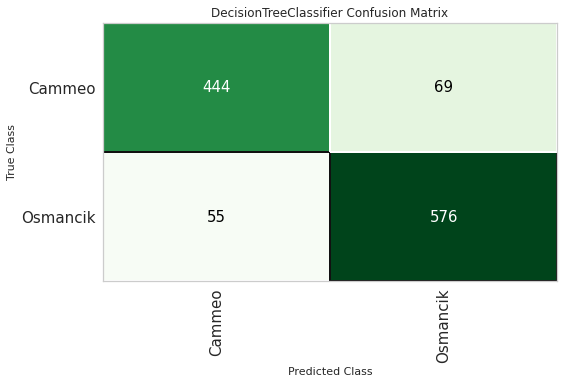

In [43]:
plot_model(dt, plot = 'confusion_matrix')

## Náhodné lesy

In [44]:
#vytvoreni, trenovani a testovani modelu
rf = create_model('rf', cross_validation=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9222,0.9731,0.9429,0.9182,0.9304,0.8422,0.8426


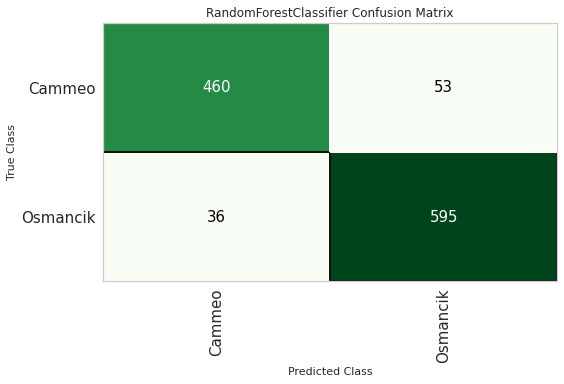

In [45]:
plot_model(rf, plot = 'confusion_matrix')

## Bayesovská klasifikace

In [46]:
#vytvoreni, trenovani a testovani modelu
nb = create_model('nb', cross_validation=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9135,0.9692,0.9366,0.9092,0.9227,0.8245,0.8249


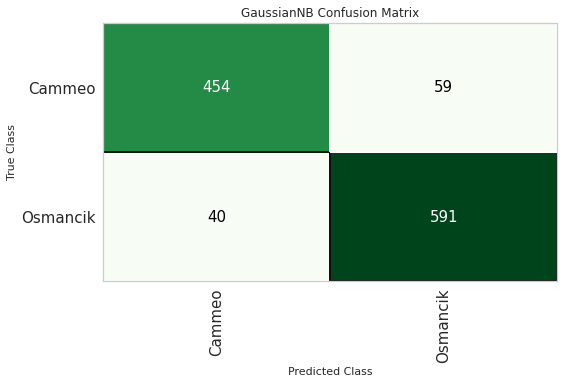

In [47]:
plot_model(nb, plot='confusion_matrix')

## Neuronové sítě

In [48]:
#vytvoreni, trenovani a testovani modelu
mlp = create_model('mlp', cross_validation=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7229,0.9131,0.5483,0.9153,0.6858,0.4645,0.5138


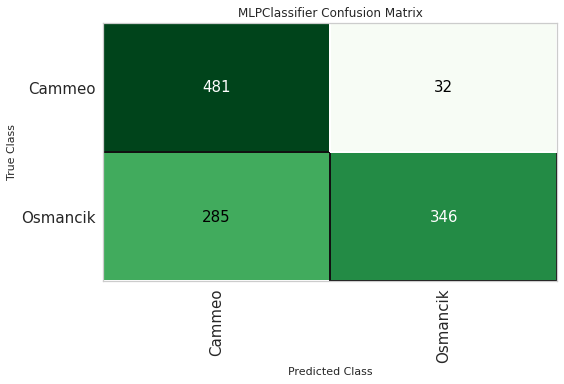

In [49]:
plot_model(mlp, plot='confusion_matrix')

## K – nejbližších sousedů

In [50]:
#vytvoreni, trenovani a testovani modelu
knn = create_model('knn', cross_validation=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.896,0.9466,0.935,0.8832,0.9084,0.7883,0.79


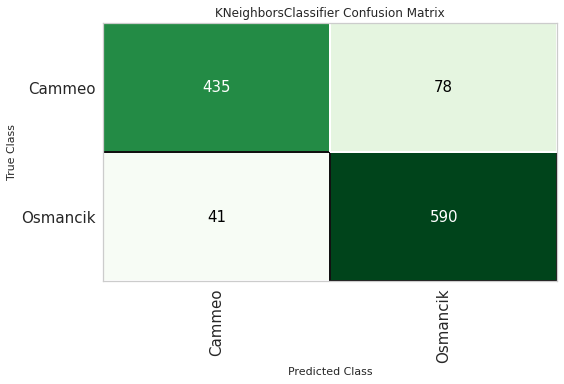

In [51]:
plot_model(knn, plot='confusion_matrix')